# Importing petinent libraries

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.signal import butter, filtfilt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, precision_score, recall_score

# Importing and storing the data

In [2]:
#Setting the main folder path as a parent directory
parent_folder = "EMG_data_for_gestures-master"
master_data = []

#Looping through the folders in the parent folder
for child_folder in os.listdir(parent_folder):
    child_folder_path = os.path.join(parent_folder, child_folder)
    if os.path.isdir(child_folder_path):
        #Extracting the subject from the child folder name
        subject = child_folder.split("_")[-1]
        #Looping through the files in each child folder
        for file in os.listdir(child_folder_path):
            file_path = os.path.join(child_folder_path, file)
            #Reading in the .txt files in the child folder
            if file.endswith(".txt"):
                df = pd.read_csv(file_path, delimiter="\t")
                #Adding the subject column to the DataFrame
                df['subject'] = subject
                master_data.append(df)

#Concatenating all the files into one main DataFrame
gestures = pd.concat(master_data)

# Exploratory Data Analysis

## Inspecting the data

In [3]:
#Checking data arrangement
gestures.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,subject
0,1,-0.00004,-0.00002,-0.00001,-0.00002,-0.00001,-0.00001,0.00002,-0.00001,0.0,03
1,4,-0.00004,-0.00002,-0.00001,-0.00002,-0.00001,-0.00001,0.00002,-0.00001,0.0,03
2,5,-0.00004,-0.00002,-0.00001,-0.00002,-0.00001,-0.00001,0.00002,-0.00001,0.0,03
3,6,-0.00004,-0.00002,-0.00001,-0.00002,-0.00001,-0.00001,0.00002,-0.00001,0.0,03
4,7,-0.00002,-0.00001,0.00000,0.00001,0.00000,-0.00001,-0.00002,0.00001,0.0,03


In [4]:
#Checking data dimensions
print(f"⦿ Rows: {gestures.shape[0]}")
print(f"⦿ Columns: {gestures.shape[1]}")

⦿ Rows: 4237908
⦿ Columns: 11


In [5]:
#checking data description
gestures.describe().T

,count,mean,std,min,25%,50%,75%,max
time,4237908.0,31136.891602,18680.791749,0.00000,15290.00000,30546.00000,45804.00000,97144.00000
channel1,4237908.0,-0.000008,0.000163,-0.00128,-0.00003,-0.00001,0.00002,0.00127
channel2,4237908.0,-0.000009,0.000119,-0.00128,-0.00004,-0.00001,0.00002,0.00127
channel3,4237908.0,-0.000010,0.000124,-0.00128,-0.00004,-0.00001,0.00003,0.00127
channel4,4237908.0,-0.000010,0.000226,-0.00128,-0.00006,-0.00001,0.00004,0.00127
channel5,4237908.0,-0.000016,0.000272,-0.00128,-0.00008,-0.00001,0.00005,0.00127
channel6,4237908.0,-0.000011,0.000215,-0.00128,-0.00006,-0.00001,0.00003,0.00127
channel7,4237908.0,-0.000009,0.000153,-0.00128,-0.00004,-0.00001,0.00002,0.00127
channel8,4237908.0,-0.000010,0.000172,-0.00128,-0.00003,-0.00001,0.00001,0.00127
class,4237907.0,1.265671,1.989693,0.00000,0.00000,0.00000,2.00000,7.00000


In [6]:
#Checking data type
gestures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237908 entries, 0 to 62680
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   time      int64  
 1   channel1  float64
 2   channel2  float64
 3   channel3  float64
 4   channel4  float64
 5   channel5  float64
 6   channel6  float64
 7   channel7  float64
 8   channel8  float64
 9   class     float64
 10  subject   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 388.0+ MB


In [7]:
#Checking for null values
gestures.isnull().sum()

time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       1
subject     0
dtype: int64

In [8]:
#Dropping null values
gestures = gestures.dropna(subset = ["class"])

In [9]:
#Converting class data type to int64
gestures['class'] = gestures['class'].astype('int64')

#Checking data type to confirm cange
gestures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237907 entries, 0 to 62680
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   time      int64  
 1   channel1  float64
 2   channel2  float64
 3   channel3  float64
 4   channel4  float64
 5   channel5  float64
 6   channel6  float64
 7   channel7  float64
 8   channel8  float64
 9   class     int64  
 10  subject   object 
dtypes: float64(8), int64(2), object(1)
memory usage: 388.0+ MB


In [10]:
#Checking for duplicates
duplicate_rows = gestures[gestures.duplicated(keep=False)]

if gestures.duplicated().sum() > 0:
    display(duplicate_rows)
    print({gestures.duplicated().sum()})

In [11]:
#Dropping duplicates
gestures.drop_duplicates(inplace=True)

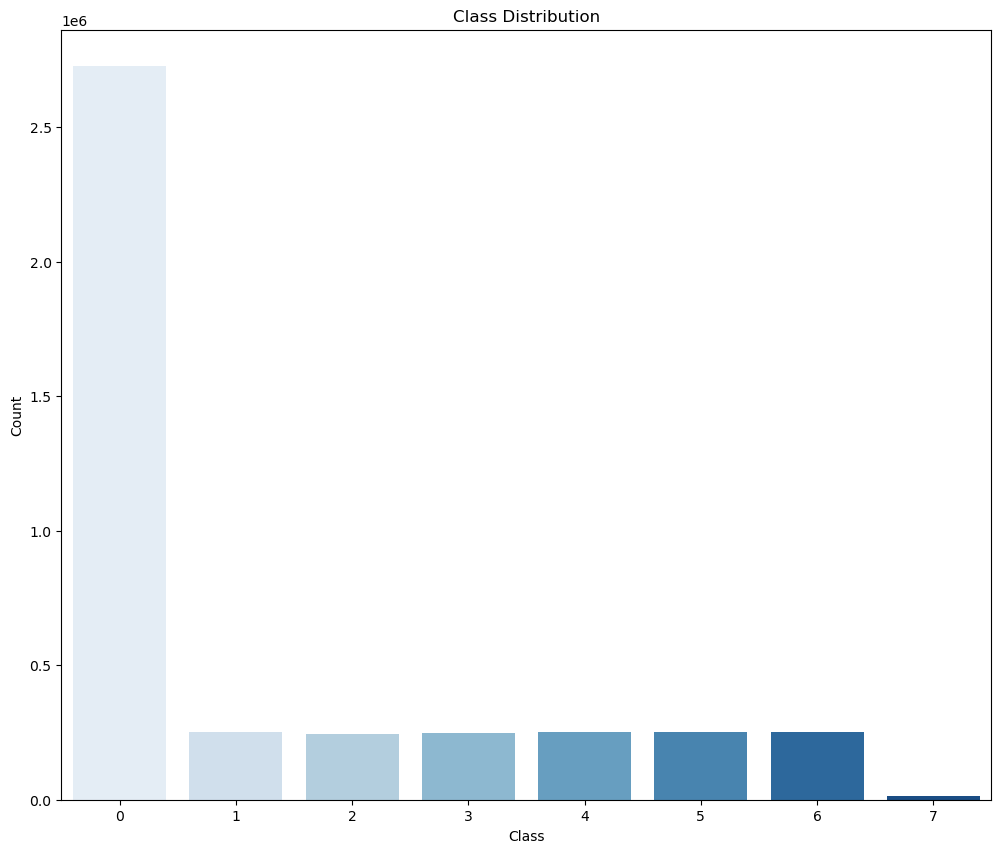

In [12]:
#Checking data distribution by class
plt.figure(figsize=(12, 10))
sns.countplot(x="class", data=gestures, palette="Blues")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

plt.show()

In [13]:
#Checking skew
gestures.skew(axis=0)

time        0.210679
channel1    0.035962
channel2    0.070317
channel3   -0.106766
channel4    0.027530
channel5   -0.015932
channel6    0.073039
channel7    0.063578
channel8   -0.053711
class       1.304621
subject     0.043894
dtype: float64

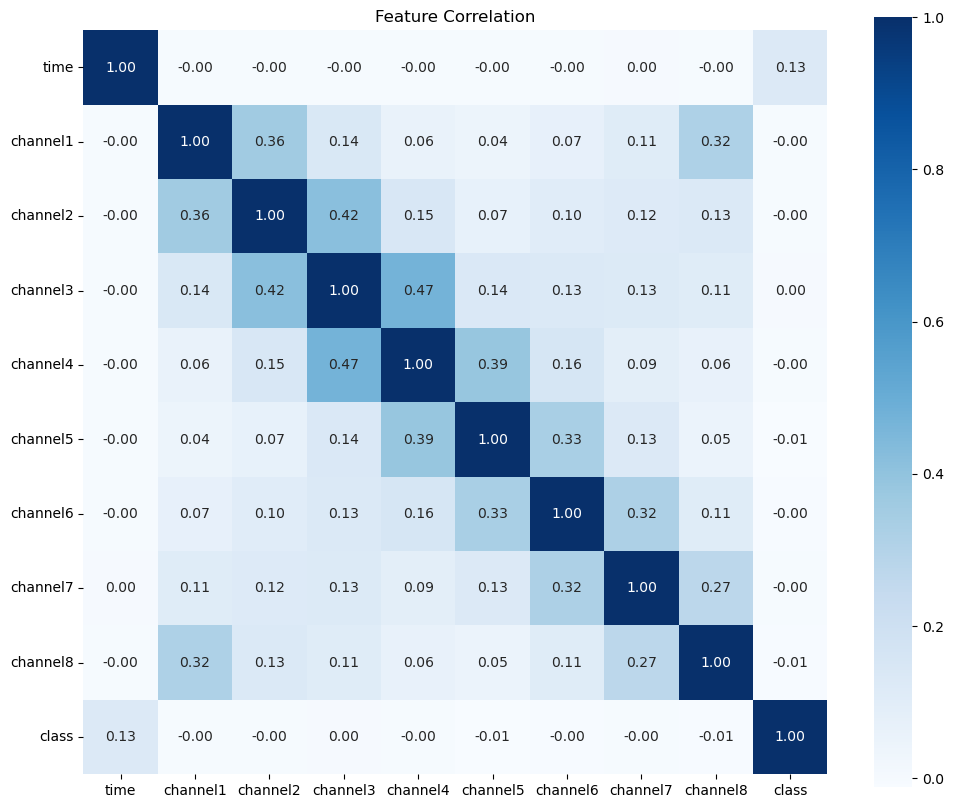

In [14]:
#Checking correlation
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(gestures.corr(), annot=True, cmap="Blues", fmt=".2f", square=True)
plt.title('Feature Correlation')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

# Data Preprocessing

## Balancing the data

In [15]:
#Dropping time
gestures = gestures.drop("time", axis=1)

In [16]:
#Removing class 0 and class 7
gestures = gestures[(gestures["class"] != 0) & (gestures["class"] != 7)]

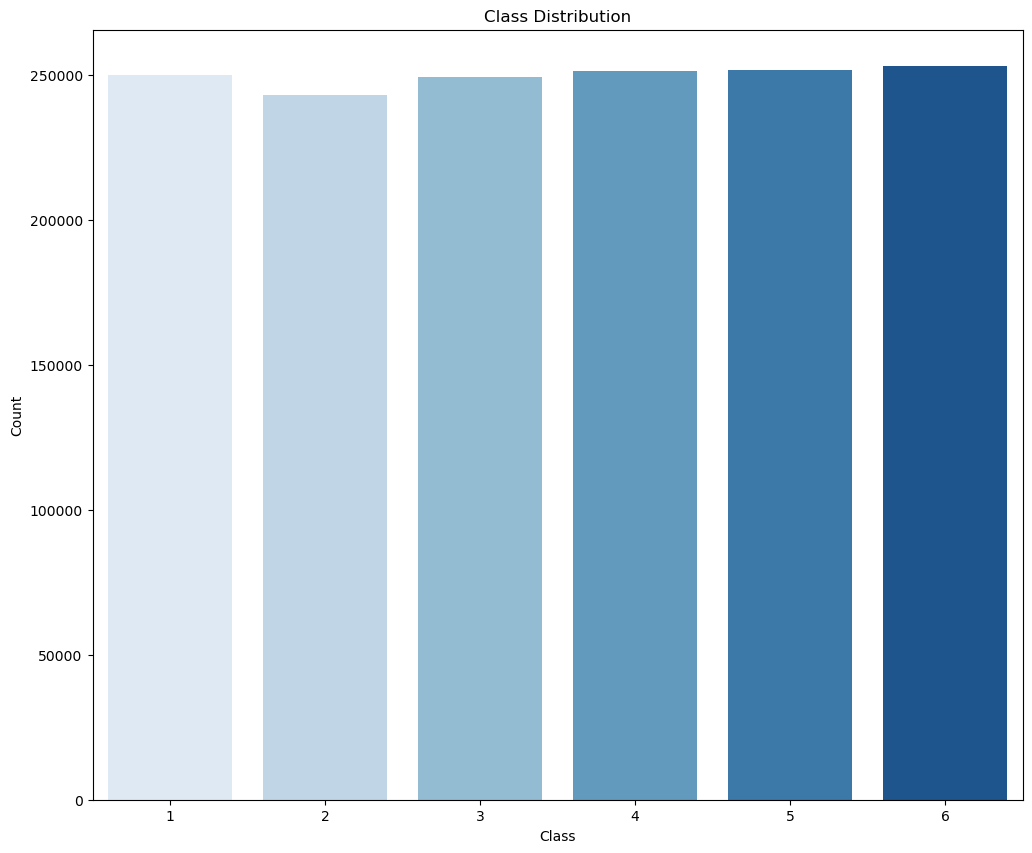

In [17]:
#Checking new data distribution by class
plt.figure(figsize=(12, 10))
sns.countplot(x="class", data=gestures, palette="Blues")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

plt.show()

In [18]:
gestures.shape

(1499054, 10)

## Scaling the data

In [19]:
#Creating a StandardScaler instance
scaler = StandardScaler()

#Selecting the columns to normalize
columns_normalized = ["channel1", "channel2", "channel3", "channel4", "channel5", 
                     "channel6", "channel7", "channel8"]

#Fitting the scaler on the columns to normalize
scaler.fit(gestures[columns_normalized])

#Transforming the columns to normalize
gestures[columns_normalized] = scaler.transform(gestures[columns_normalized])

#Inspecting Scaling effect
gestures.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,subject
1248,-0.062926,-0.002383,0.069748,0.073351,0.091926,0.087183,-0.00055,0.002182,1,03
1249,-0.062926,-0.002383,0.069748,0.073351,0.091926,0.087183,-0.00055,0.002182,1,03
1250,-0.062926,-0.002383,0.069748,0.073351,0.091926,0.087183,-0.00055,0.002182,1,03
1251,-0.062926,-0.002383,0.069748,0.073351,0.091926,0.087183,-0.00055,0.002182,1,03
1252,-0.062926,-0.002383,0.069748,0.073351,0.091926,0.087183,-0.00055,0.002182,1,03


## Positive Rectification

In [20]:
#Changing all values to absolute values to eliminate negatives
gestures[columns_normalized] = np.abs(gestures[columns_normalized])

#Inspecting Positive Rectification effect
gestures.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,subject
1248,0.062926,0.002383,0.069748,0.073351,0.091926,0.087183,0.00055,0.002182,1,03
1249,0.062926,0.002383,0.069748,0.073351,0.091926,0.087183,0.00055,0.002182,1,03
1250,0.062926,0.002383,0.069748,0.073351,0.091926,0.087183,0.00055,0.002182,1,03
1251,0.062926,0.002383,0.069748,0.073351,0.091926,0.087183,0.00055,0.002182,1,03
1252,0.062926,0.002383,0.069748,0.073351,0.091926,0.087183,0.00055,0.002182,1,03


## Filtrering

In [21]:
#Defining the filter parameters
#Filter order
filter_order = 4

#Sampling rate in Hz
sampling_rate = 1000

#Cut-off frequency
cutoff_freq = 5

#Calculating the normalized cut-off frequency
nyquist_freq = sampling_rate / 2  #Nyquist frequency is defined as half of the sampling rate
normalized_cutoff_freq = cutoff_freq / nyquist_freq

#Selecting the columns to filter
columns_to_filter = [f"channel{i}" for i in range(1, 9)]

#Applying the Butterworth filter to the selected columns
for column in columns_to_filter:
    #Adding padding to the beginning and end of the input vector
    pad_len = len(gestures[column])
    padded_data = np.pad(gestures[column], (pad_len, pad_len), mode="constant")
    
    #Creating the Butterworth filter coefficients
    b, a = butter(filter_order, normalized_cutoff_freq, btype="low", analog=False, output="ba")
    
    #Applying the filter to the padded data
    filtered_padded_data = filtfilt(b, a, padded_data)
    
    #Removing the filtered data from the padded data
    filtered_data = filtered_padded_data[pad_len:-pad_len]
    
    #Replace the original column with the filtered data
    gestures[column] = filtered_data

#Inspecting the filtered data
gestures.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,subject
1248,0.033121,0.026533,0.042812,0.028361,0.027969,0.019851,0.026702,0.020007,1,03
1249,0.033751,0.027028,0.043878,0.028848,0.028464,0.020254,0.027389,0.020600,1,03
1250,0.034378,0.027523,0.044949,0.029333,0.028957,0.020658,0.028079,0.021197,1,03
1251,0.035003,0.028018,0.046023,0.029816,0.029447,0.021064,0.028771,0.021799,1,03
1252,0.035623,0.028511,0.047101,0.030296,0.029936,0.021473,0.029465,0.022405,1,03


## Sliding Window

In [22]:
#Setting the window size
window_size = 200
#Setting the slide length
slide = 50

#Initializing an empty list to store the windowed data
windowed_data = []

#Iterating over each subject in the gestures DataFrame
for subject in gestures['subject'].unique():
    #Filtering the data for the current subject
    subject_data = gestures[gestures['subject'] == subject]
    
    #Calculating the number of windows based on the window size and slide length
    num_windows = (len(subject_data) - window_size) // slide + 1
    
    #Iterating over each window
    for i in range(num_windows):
        #Calculating the start and end indices of the window
        start_index = i * slide
        end_index = start_index + window_size
        
        #Extracting the windowed data and assign the subject
        window = subject_data.iloc[start_index:end_index]
        window['subject'] = subject
        
        #Appending the windowed data to the windowed_data list
        windowed_data.append(window)

#Concatenating all the windowed data into the windows DataFrame
windows = pd.concat(windowed_data)
windows.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,subject
1248,0.033121,0.026533,0.042812,0.028361,0.027969,0.019851,0.026702,0.020007,1,03
1249,0.033751,0.027028,0.043878,0.028848,0.028464,0.020254,0.027389,0.020600,1,03
1250,0.034378,0.027523,0.044949,0.029333,0.028957,0.020658,0.028079,0.021197,1,03
1251,0.035003,0.028018,0.046023,0.029816,0.029447,0.021064,0.028771,0.021799,1,03
1252,0.035623,0.028511,0.047101,0.030296,0.029936,0.021473,0.029465,0.022405,1,03


In [23]:
#Checking data dimensions
print(f"⦿ Rows: {windows.shape[0]}")
print(f"⦿ Columns: {windows.shape[1]}")

⦿ Rows: 5970800
⦿ Columns: 10


## Features Extraction

In [24]:
#Define the features functions

#Defining function for Mean Absolute Value
def mav(data):
    return np.mean(np.abs(data))

#Defining function for Root Mean Square
def rms(data):
    return np.sqrt(np.mean(data ** 2))

#Defining function for Signal Slope Change
def ssc(data):
    differences = np.diff(data)
    return np.sum(differences)

#Defining function for Wave Length
def wave_length(data):
    return np.sum(np.abs(np.diff(data)))

#Defining function for Hjorth Activity
def hjorth_activity(data):
    return np.var(data)

#Defining function for Hjorth Mobility
def hjorth_mobility(data):
    diff = np.diff(data)
    var = np.var(diff)
    return np.sqrt(var / np.var(data))

#Defining function for Hjorth Complexity
def hjorth_complexity(data):
    diff1 = np.diff(data)
    diff2 = np.diff(diff1)
    var1 = np.var(diff1)
    var2 = np.var(diff2)
    return np.sqrt(var2 / var1)

#Defining feature extraction function
def extract_features(data):
    features = []
    for i in range(8):#8 channels
        channel_data = data[f'channel{i+1}']
        channel_features = (rms(channel_data),
                            ssc(channel_data),
                            mav(channel_data),
                            wave_length(channel_data),
                            hjorth_activity(channel_data),
                            hjorth_mobility(channel_data),
                            hjorth_complexity(channel_data))
        features.extend(channel_features)
    return features

In [25]:
#Applying feature extraction to the windowed dataset
extracted_feat = windows.groupby(["class", "subject"]).apply(extract_features).apply(pd.Series)

#Reseting the index and renaming the columns
extracted_feat.reset_index(level="class",inplace=True)
feature_columns = ['class'] + [f'feature{i+1}' for i in range(extracted_feat.shape[1]-1)]
extracted_feat.columns = feature_columns

#Inspecting the new DataFrame
extracted_feat.head()

,class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56
subject,,,,,,,,,,,,,,,,,,,,,
01,1,0.084813,-0.208652,0.064192,32.455371,0.003221,0.201310,1.414389,0.156231,-0.006772,...,0.008932,0.206957,1.414802,0.063617,-0.152714,0.048215,25.604124,0.001799,0.198609,1.413597
02,1,0.062100,-0.310444,0.057770,12.638467,0.000536,0.131356,1.405190,0.129745,0.059259,...,0.007028,0.188234,1.414418,0.060523,-0.656899,0.051551,17.288622,0.001089,0.145976,1.402032
03,1,0.106453,0.731882,0.076865,35.928677,0.005486,0.190914,1.414188,0.231232,0.697824,...,0.013055,0.207114,1.413853,0.119815,0.908744,0.076916,42.150698,0.008752,0.192296,1.413395
04,1,0.117260,-0.432960,0.073402,40.021067,0.008688,0.188494,1.412944,0.144986,-0.074799,...,0.009339,0.200189,1.414643,0.080270,-0.129252,0.061122,26.767708,0.002840,0.173798,1.409902
05,1,0.057211,0.050554,0.052406,13.846928,0.000527,0.181280,1.413260,0.124607,-0.014390,...,0.004010,0.212796,1.412045,0.076341,-0.665761,0.051615,26.640797,0.003387,0.188330,1.412054


In [26]:
#Checking data dimensions
print(f"⦿ Rows: {extracted_feat.shape[0]}")
print(f"⦿ Columns: {extracted_feat.shape[1]}")

⦿ Rows: 216
⦿ Columns: 57


## Splitting the data

In [27]:
#Dropping the class and time columns
#Storing the remaining features in a new variable
model_feat = extracted_feat.drop(["class"], axis=1)

#Storing the class column in a new variable
model_label = extracted_feat["class"]

In [28]:
#Splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(model_feat, model_label, test_size=0.2, random_state=23)

In [29]:
#Checking all dataset contains all 6 remaining classes
print(f"Train Dataset:\n {y_train.value_counts(normalize=True).sort_index()}\n")
print(f"Test Dataset:\n {y_test.value_counts(normalize=True).sort_index()}")

Train Dataset:
 1    0.180233
2    0.162791
3    0.145349
4    0.162791
5    0.180233
6    0.168605
Name: class, dtype: float64

Test Dataset:
 1    0.113636
2    0.181818
3    0.250000
4    0.181818
5    0.113636
6    0.159091
Name: class, dtype: float64


# Modelling

In [30]:
#Defining a function to display confusion matrix
def plot_confusion_matrix(actual, predicted, classifier=""):
    #Getting labels from actual labels
    labels = sorted(set(actual))
    plt.rcParams["figure.figsize"] = (18, 10)
    
    display = sns.heatmap(confusion_matrix(actual, predicted),cmap="Blues", annot=True, fmt="d")
    display.set_xticklabels(labels, rotation=0, size=13)
    display.set_yticklabels(labels, rotation=0, size=13)
    
    plt.title(classifier, fontsize=18)
    plt.xlabel("Predicted Values", size=15)
    plt.ylabel("Actual Values", size=15)
    plt.show()

## Naive Bayes Classifier 

In [31]:
#Define the parameter grid for grid search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7],
    'priors': [None, [0.2, 0.8], [0.5, 0.5]],
}

#Creating a Gaussian Naive Bayes model instance
nb = GaussianNB()

#Creating a GridSearchCV instance with the Naive Bayes model and parameter grid
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring="f1_macro")

#Fitting the model on the training data using grid search
grid_search.fit(x_train, y_train)

#Getting the best model with the optimized parameters
best_nb = grid_search.best_estimator_

#Printing the best hyperparameters selected for the best model
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'priors': None, 'var_smoothing': 1e-09}


In [32]:
%%time
#Using the best model to predict the labels using the test set
nb_pred = best_nb.predict(x_test)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      0.62      0.71         8
           3       1.00      0.73      0.84        11
           4       0.80      1.00      0.89         8
           5       0.80      0.80      0.80         5
           6       0.70      1.00      0.82         7

    accuracy                           0.84        44
   macro avg       0.86      0.86      0.84        44
weighted avg       0.86      0.84      0.84        44

CPU times: user 8.77 ms, sys: 2.42 ms, total: 11.2 ms
Wall time: 9.36 ms


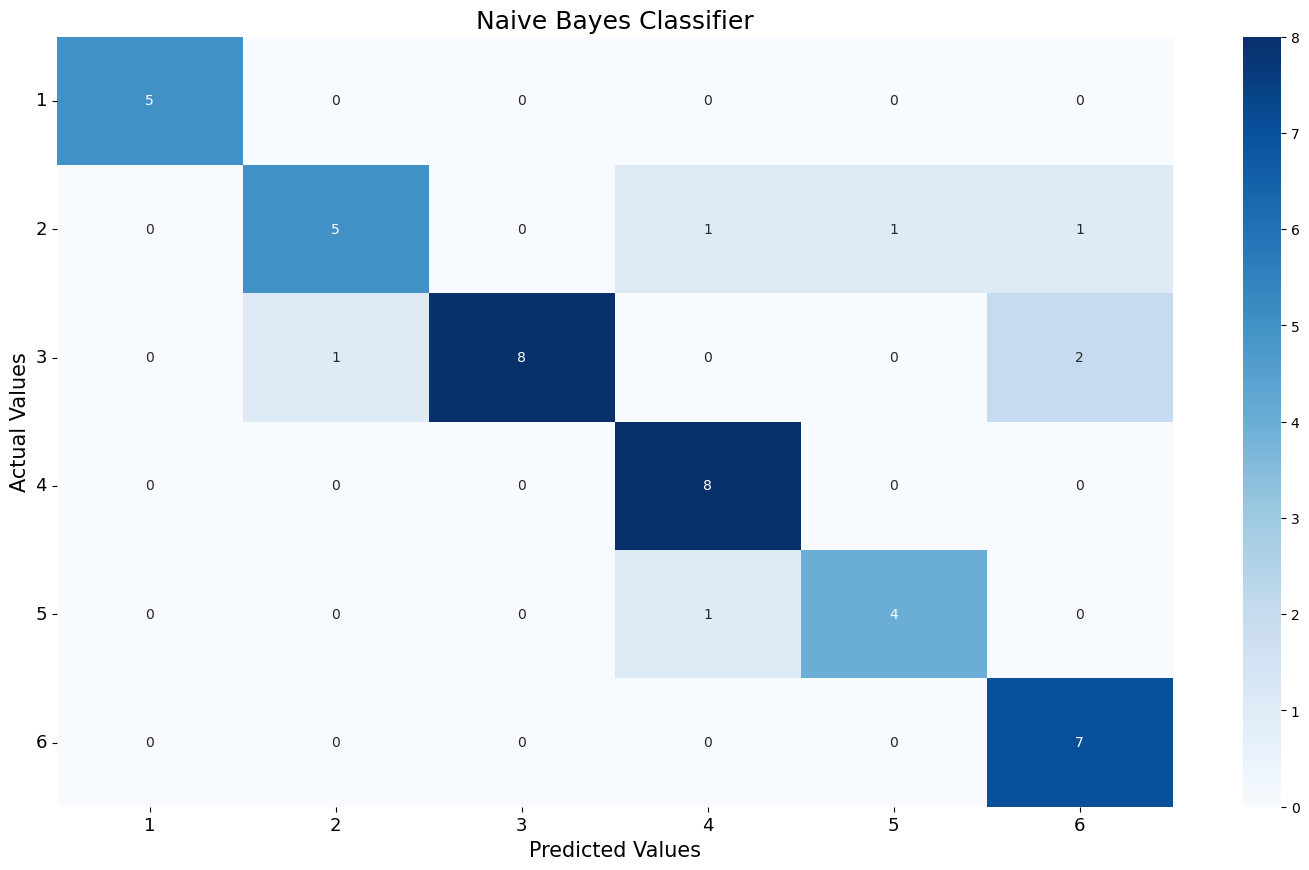

In [33]:
plot_confusion_matrix(y_test, nb_pred, "Naive Bayes Classifier")

## K-Nearest Neighbours Classifier

In [34]:
#Defining the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

#Creating a k-Nearest Neighbors model instance
knn = KNeighborsClassifier()

#Creating a GridSearchCV instance with the k-Nearest Neighbors model and parameter grid
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="f1_macro")

#Fitting the model on the training data using grid search
grid_search.fit(x_train, y_train)

#Getting the best model with the optimized parameters
best_knn = grid_search.best_estimator_

# Print the best hyperparameters selected for the best model
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'n_neighbors': 5, 'weights': 'distance'}


In [35]:
%%time
#Using the best model to predict the labels using the test set
knn_pred = best_knn.predict(x_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       0.50      0.80      0.62         5
           2       0.83      0.62      0.71         8
           3       0.78      0.64      0.70        11
           4       0.88      0.88      0.88         8
           5       0.43      0.60      0.50         5
           6       1.00      0.86      0.92         7

    accuracy                           0.73        44
   macro avg       0.74      0.73      0.72        44
weighted avg       0.77      0.73      0.74        44

CPU times: user 35.1 ms, sys: 14.8 ms, total: 49.9 ms
Wall time: 9.34 ms


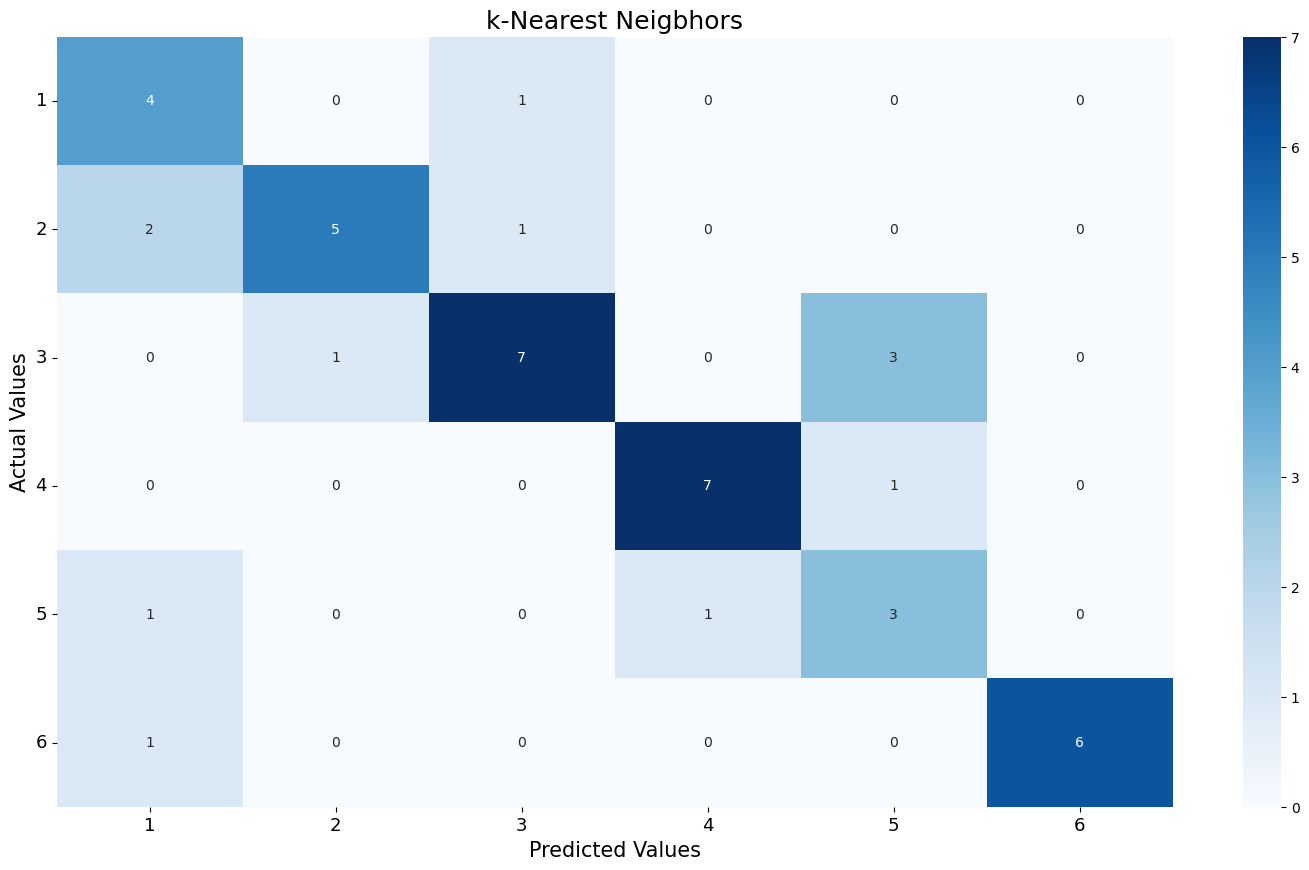

In [36]:
plot_confusion_matrix(y_test, knn_pred, "k-Nearest Neigbhors")

## Random Forest Classifier

In [37]:
#Defining the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}

#Creating a Random Forest Classifier model instance
rfc = RandomForestClassifier()

#Creating a GridSearchCV instance with the Random Forest Classifier model and parameter grid
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring="f1_macro")

#Fitting the model on the training data using grid search
grid_search.fit(x_train, y_train)

#Getting the best model with the optimized parameters
best_rfc = grid_search.best_estimator_

# Print the best hyperparameters selected for the best model
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'max_depth': None, 'n_estimators': 300}


In [38]:
%%time
#Using the best model to predict the labels using the test set
rfc_pred = best_rfc.predict(x_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.88      0.88      0.88         8
           3       1.00      0.73      0.84        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       0.70      1.00      0.82         7

    accuracy                           0.91        44
   macro avg       0.93      0.93      0.92        44
weighted avg       0.93      0.91      0.91        44

CPU times: user 30.1 ms, sys: 2.55 ms, total: 32.7 ms
Wall time: 30.1 ms


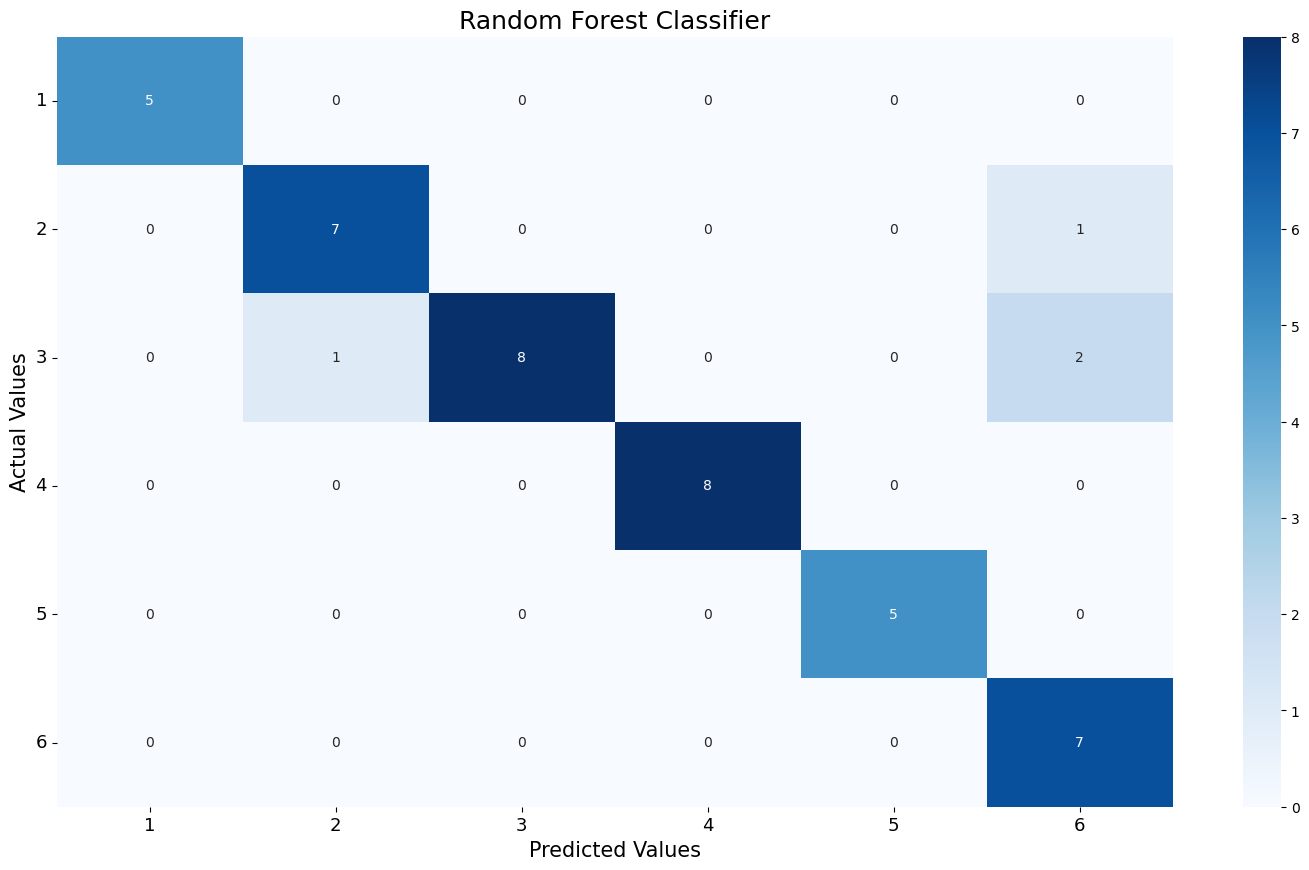

In [39]:
plot_confusion_matrix(y_test, rfc_pred, "Random Forest Classifier")

## Support Vector Classifier

In [40]:
#Defining the parameter grid for grid search
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf']
}

#Creating a Support Vector Classifier model instance
svc = SVC()

#Creating a GridSearchCV instance with the Support Vector Classifier model and parameter grid
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring="f1_macro")

#Fitting the model on the training data using grid search
grid_search.fit(x_train, y_train)

#Getting the best model with the optimized parameters
best_svc = grid_search.best_estimator_

#Printing the best hyperparameters selected for the best model
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'C': 1, 'kernel': 'linear'}


In [48]:
%%time
#Using the best model to predict the labels using the test set
svc_pred = best_svc.predict(x_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           1       0.43      0.60      0.50         5
           2       0.75      0.75      0.75         8
           3       0.82      0.82      0.82        11
           4       0.88      0.88      0.88         8
           5       0.50      0.40      0.44         5
           6       1.00      0.86      0.92         7

    accuracy                           0.75        44
   macro avg       0.73      0.72      0.72        44
weighted avg       0.76      0.75      0.75        44

CPU times: user 8.06 ms, sys: 20.9 ms, total: 29 ms
Wall time: 75.3 ms


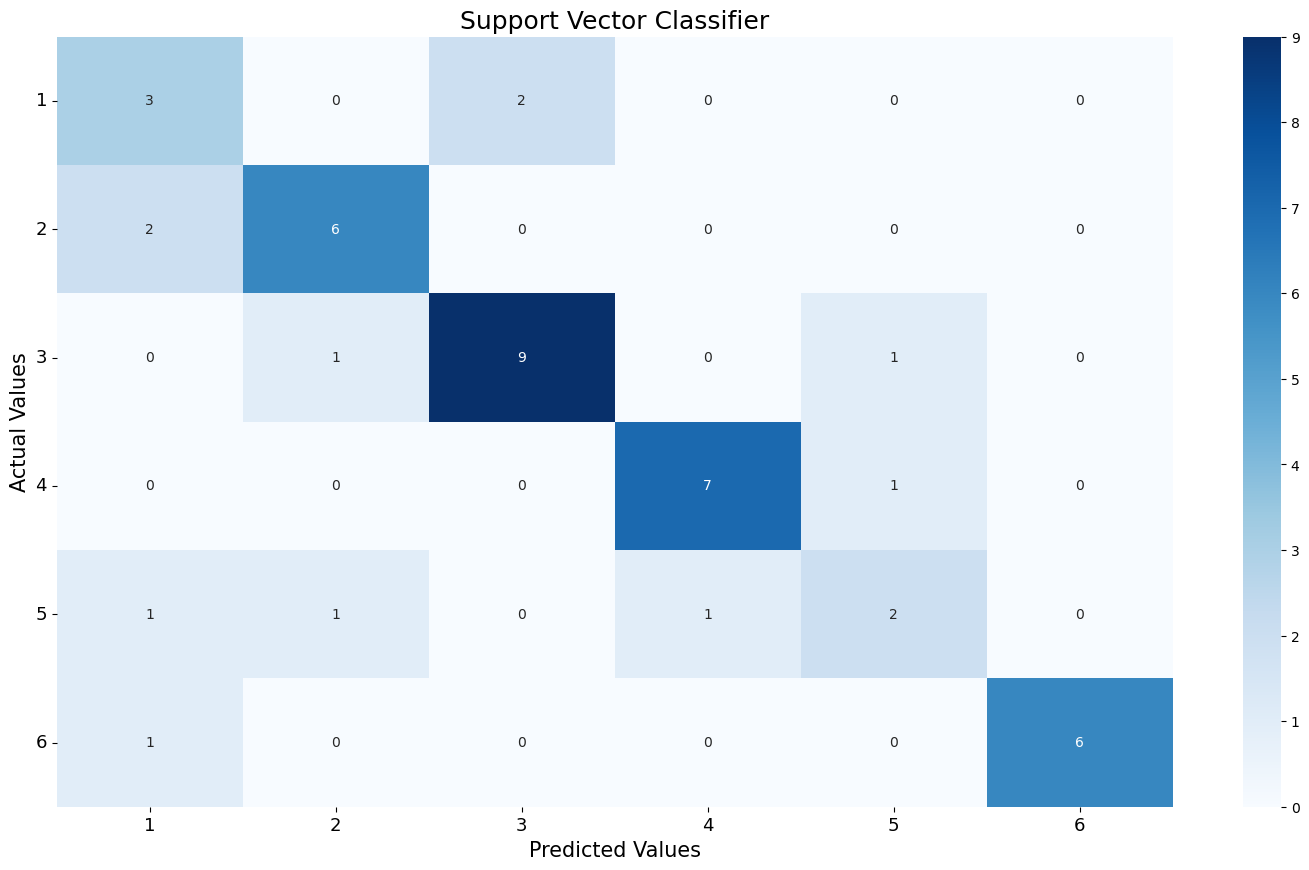

In [42]:
plot_confusion_matrix(y_test, svc_pred, "Support Vector Classifier")

## XGBoost Classifier

In [43]:
#Initializing the LabelEncoder
label_encoder = LabelEncoder()

#Defining the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

#Creating an XGBoost Classifier model instance
xgb = XGBClassifier()

#Creating a GridSearchCV instance with the XGBoost Classifier model and parameter grid
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring="f1_macro")

#Fitting the model on the training data using grid search
grid_search.fit(x_train, label_encoder.fit_transform(y_train))

#Getting the best model with the optimized parameters
best_xgb = grid_search.best_estimator_

#Printing the best hyperparameters selected for the best model
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3}


In [44]:
%%time
#Using the best model to predict the labels using the test set
xgb_pred = best_xgb.predict(x_test)
print(classification_report(label_encoder.fit_transform(y_test), xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.70      0.88      0.78         8
           2       0.86      0.55      0.67        11
           3       1.00      0.88      0.93         8
           4       0.71      1.00      0.83         5
           5       0.62      0.71      0.67         7

    accuracy                           0.80        44
   macro avg       0.82      0.83      0.81        44
weighted avg       0.82      0.80      0.79        44

CPU times: user 52.9 ms, sys: 30.5 ms, total: 83.4 ms
Wall time: 13.2 ms


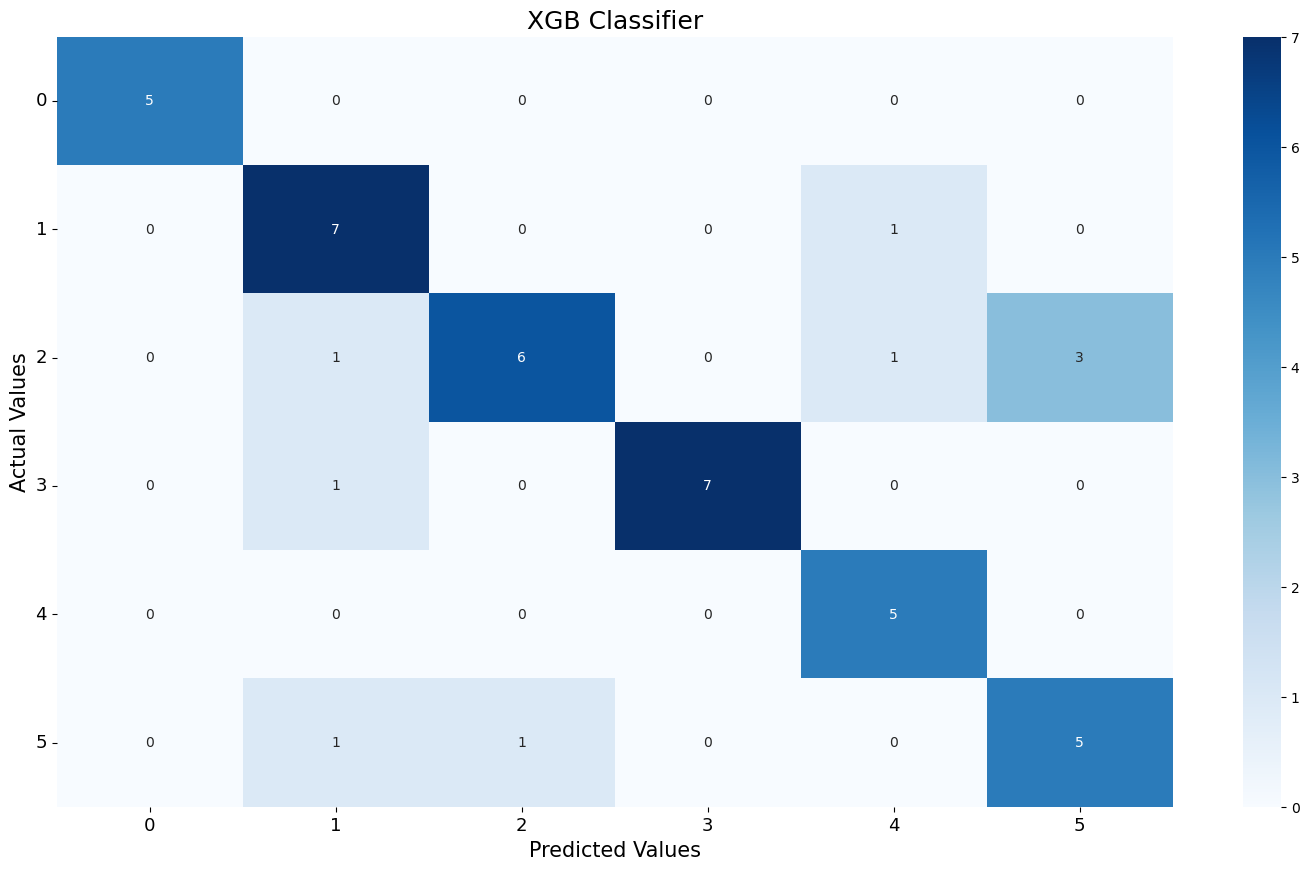

In [45]:
plot_confusion_matrix(label_encoder.fit_transform(y_test), xgb_pred, "XGB Classifier")

Random Forest Classifier selected as best model

## Cross Validation - RFC Model

In [47]:
classifiers = [RandomForestClassifier(max_depth=None, n_estimators=300)]
scores = []
for classifier in classifiers:
    y_pred = cross_val_predict(classifier, x_train, y_train, cv=5)
    #Cross validation accuracy
    accuracy = accuracy_score(y_train, y_pred)

    #Calculating mean square errors
    mse = -cross_val_score(classifier, x_train, y_train, scoring="neg_mean_squared_error", cv=5)
    rmse = np.sqrt(mse.mean())

    #F1 score
    f1 = cross_val_score(classifier, x_test, y_test, scoring="f1_macro", cv=5).mean()

    #Precision and recall
    precision = precision_score(y_train, y_pred, average='macro')
    recall = recall_score(y_train, y_pred, average='macro')

    scores.append([classifier.__class__.__name__, accuracy, precision, recall, f1, rmse])

#Create a DataFrame to store the scores
scores_dataFrame = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall", "F1", "Root Mean Square Error"],
                                data=scores)
display(scores_dataFrame)

,Classifier,Accuracy,Precision,Recall,F1,Root Mean Square Error
0,RandomForestClassifier,0.912791,0.914111,0.912178,0.674444,0.867334


---